In [1]:
import pandas as pd
import sklearn
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams [ 'figure.figsize'] = ( 8, 8 )

In [2]:
import joblib
#joblib.__version__
#pd.__version__
sklearn.__version__

'1.0.2'

In [3]:
#modelRF_lrgen = load('./models/gsRFC_lrgen_CART_fulltarget.joblib')
#modelRFreduced_lrgen = load('./models/gsRFC_lrgen_CART_reducedtarget_4l3c4r.joblib')
#modelRF_lrecon = load('./models/gsRFC_lrecon_CART_fulltarget.joblib')
#modelRFreduced_lrecon = load('./models/gsRFC_lrecon_CART_reducedtarget_4l3c4r.joblib')
#modelRF_galtan = load('./models/gsRFC_galtan_CART_fulltarget.joblib')
#modelRFreduced_galtan = load('./models/gsRFC_galtan_CART_reducedtarget_4l3c4r.joblib')

modelRF_lrgen = load('./models/gsRFC_lrgen_fulltarget_NoImputation.joblib')
modelRFreduced_lrgen = load('./models/gsRFC_lrgen_reducedtarget_4l3c4r_NoImputation.joblib')
modelRF_lrecon = load('./models/gsRFC_lrecon_fulltarget_NoImputation.joblib')
modelRFreduced_lrecon = load('./models/gsRFC_lrecon_reducedtarget_4l3c4r_NoImputation.joblib')
modelRF_galtan = load('./models/gsRFC_galtan_fulltarget_NoImputation.joblib')
modelRFreduced_galtan = load('./models/gsRFC_galtan_reducedtarget_4l3c4r_NoImputation.joblib')

In [4]:
voter_data_full = pd.read_csv('data/CHES2014_experts.csv')

In [5]:
voter_data = [['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle', 'lrgen_selfdescription']]
# remove rows with nan's
voter_data_full_woNAN = voter_data_full.dropna().reset_index()

In [6]:
voter_data_full_woNAN = voter_data_full_woNAN.reset_index(drop=True).set_index('index')
#voter_data_full_woNAN

# RF full target space: lrgen

In [7]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrgen_factor']]

In [8]:
#test_X

In [9]:
### Write several scores to the output ###

RMSE = True
model_vector = [modelRF_lrgen]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sklearn.metrics.mean_squared_error(test_y, model.predict(test_X)))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.37368094351334574
Balanced Accuracy Score:  0.41195239792998634
Cohen-Kappa-Score:  0.29699700115300354
F1-Score:  0.373752113692172
RMSE:  2.467411545623836
__________________________________

Confusion matrix: 
 [[18  2  2  0  0  0  0  0  0  0  0]
 [12 29 23  5  3  0  0  0  1  0  3]
 [13 24 73 22 11  3  1  1  0  2  1]
 [ 0  5 23 70 37 13  6  2  4  1  0]
 [ 0  1 24 45 70 35 10  7  5  2  3]
 [ 0  1  5 24 27 73 33 15 14 10  4]
 [ 0  1  1  2 11 37 60 45 24  6  0]
 [ 0  0  1  2  3 17 75 99 50  7  3]
 [ 0  0  0  0  4 13 29 44 62 26 14]
 [ 0  0  0  2  0  3  9  7 41 24 18]
 [ 1  0  0  1  1  0  3  0 14  9 24]]
              precision    recall  f1-score   support

         0.0       0.41      0.82      0.55        22
         1.0       0.46      0.38      0.42        76
         2.0       0.48      0.48      0.48       151
         3.0       0.40      

<AxesSubplot:xlabel='Prediction using expert model'>

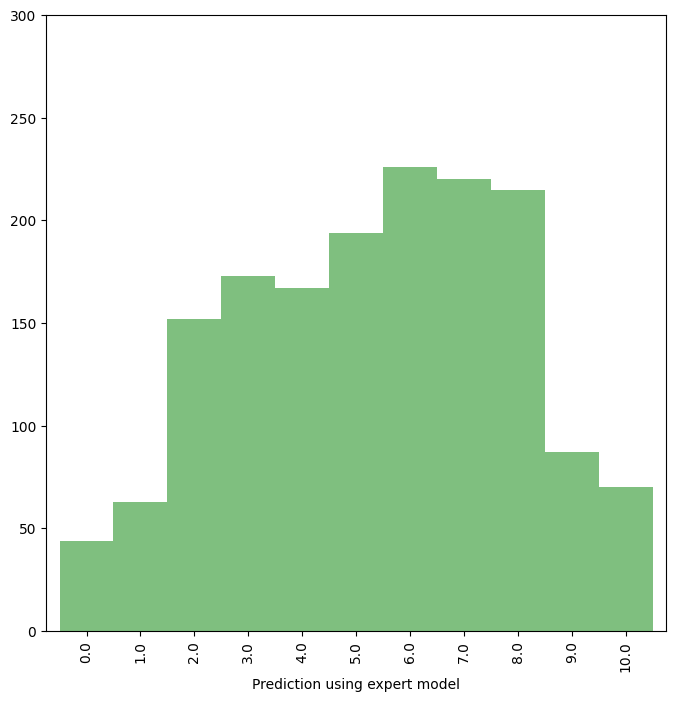

In [10]:
plotdata_predicted = pd.DataFrame(modelRF_lrgen.predict(test_X))#
plotdata_predicted.columns = ['Prediction using expert model']
plotdata_predicted = plotdata_predicted.value_counts(sort=False).reset_index()
plotdata_predicted.columns = ['Prediction using expert model', 'Total']
plotdata_predicted.set_index(['Prediction using expert model'], inplace = True)
plotdata_predicted.plot(kind='bar', legend=False, ylim=(0,300), color='g', alpha=0.5, width=1.0)
#plt.savefig('pics/PRED_VALUES_EVS_DATA_low_resolution', dpi=150)

#plt.xlabel('Prediction using expert model')
#.plot(kind='bar')
#fig.set_xlabel('Prediction using expert model')

<AxesSubplot:xlabel='LRGEN: CHES 2014'>

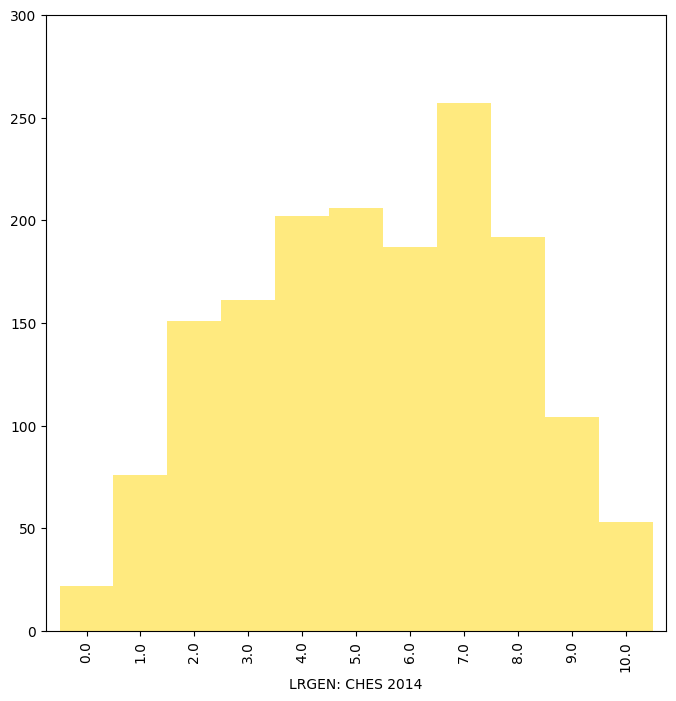

In [11]:
plotdata_actual = test_y.value_counts(sort=False)
plotdata_actual = plotdata_actual.reset_index()
plotdata_actual.columns = ['LRGEN: CHES 2014', 'Total']
plotdata_actual.set_index(['LRGEN: CHES 2014'], inplace = True)
plotdata_actual.plot(kind='bar', legend = False, ylim=(0,300), color='gold', alpha=0.5, width=1.0)
#plt.savefig('pics/ACTUAL_SELF_EVS_DATA_low_resolution', dpi=150)
#plt.xlabel('Actual self description')
#plt.xticks(range(1,12))

In [12]:
tempdata_actual = test_y.copy()
tempdata_actual['Type'] = 'LRGEN: CHES 2014'
tempdata_actual.columns = ['value', 'Type']
tempdata_predicted = pd.DataFrame(modelRF_lrgen.predict(test_X))
tempdata_predicted['Type'] = 'Prediction using expert model'
tempdata_predicted.columns = ['value', 'Type']
tempdata = pd.concat([tempdata_actual, tempdata_predicted]).reset_index(drop=True)
#tempdata

[Text(0.5, 0, 'LRGEN: CHES 2014 / Predicted Value'),
 (0.0, 300.0),

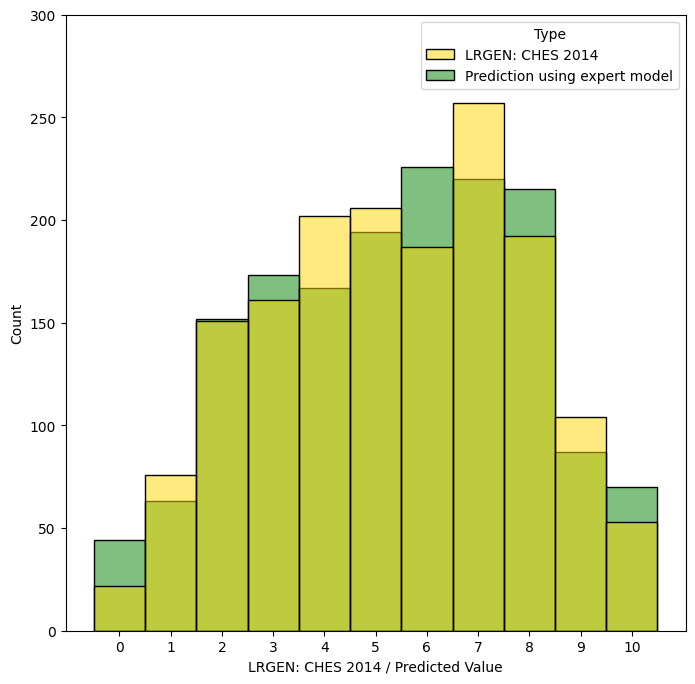

In [13]:
#sns.set_style("whitegrid")
ax = sns.histplot(data=tempdata, x='value', hue='Type', palette=['gold', 'g'], alpha = 0.5, multiple='layer', discrete=True)
ax.set(xlabel='LRGEN: CHES 2014 / Predicted Value',
       ylim=(0,300),
       xticks=range(0,11))
#plt.savefig('pics/ACTUAL_PRED_COMPARISON_EVS_DATA', dpi=600)


In [14]:
pd.Series(model.predict(test_X))

0       2.0
1       3.0
2       3.0
3       2.0
4       3.0
       ... 
1606    8.0
1607    8.0
1608    6.0
1609    8.0
1610    6.0
Length: 1611, dtype: float64

In [15]:
#data_temp = pd.DataFrame(model.predict(test_X), test_y['lrgen_selfdescription'].values).reset_index()
#data_temp.columns = ['EVS_lrgen_predicted', 'EVS_lrgen_self']
#data_temp.to_csv('lrgen_full.csv')

In [16]:
voter_data_full_woNAN['predicted_values_lrgen'] = pd.Series(modelRF_lrgen.predict(test_X))

# RF reduced target space (4l3c4r): lrgen

In [17]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrgen_factor']].replace({0: 'l', 1: 'l', 2: 'l', 3: 'l', 4: 'c', 5: 'c', 6: 'c', 7: 'r', 8: 'r', 9: 'r', 10: 'r'})

In [18]:
### Write several scores to the output ###

RMSE = False
model_vector = [modelRFreduced_lrgen]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sklearn.metrics.mean_squared_error(test_y, model.predict(test_X)))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X), labels=['l', 'c', 'r']))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.7219118559900682
Balanced Accuracy Score:  0.7298675245675829
Cohen-Kappa-Score:  0.5776706017009553
F1-Score:  0.7218369886472468
__________________________________

Confusion matrix: 
 [[328  64  18]
 [ 91 384 120]
 [  6 149 451]]
              precision    recall  f1-score   support

           c       0.64      0.65      0.64       595
           l       0.77      0.80      0.79       410
           r       0.77      0.74      0.75       606

    accuracy                           0.72      1611
   macro avg       0.73      0.73      0.73      1611
weighted avg       0.72      0.72      0.72      1611



<AxesSubplot:xlabel='0'>

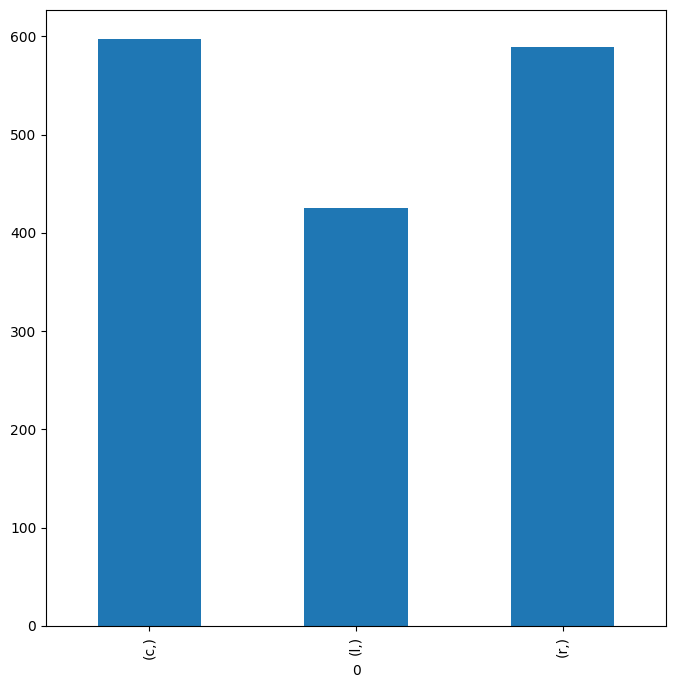

In [19]:
pd.DataFrame(modelRFreduced_lrgen.predict(test_X)).value_counts(sort=False).plot(kind='bar')

In [20]:
voter_data_full_woNAN['predicted_values_lrgen_reduced'] = pd.Series(modelRFreduced_lrgen.predict(test_X))

# RF full target space: lrecon

In [21]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrecon_factor']]

In [22]:
### Write several scores to the output ###

RMSE = True
model_vector = [modelRF_lrecon]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sklearn.metrics.mean_squared_error(test_y, model.predict(test_X)))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.3718187461204221
Balanced Accuracy Score:  0.37968624954780855
Cohen-Kappa-Score:  0.29582561454778544
F1-Score:  0.3685349178715316
RMSE:  2.654872749844817
__________________________________

Confusion matrix: 
 [[25  8  5  1  0  0  0  0  1  0  4]
 [21 35 31  8  2  0  0  1  1  1  3]
 [ 3 26 63 35 19  4  3  1  0  1  2]
 [ 2  3 46 57 53 10  0  2  1  2  2]
 [ 0  0 11 50 91 32 10  7  6  1  2]
 [ 0  2  5 13 38 74 39 10  7  3  3]
 [ 0  2  2  5 23 55 53 40 23  4  2]
 [ 0  0  2  1  5 15 41 70 83  7  3]
 [ 0  3  0  2  1  3  6 45 93 16  3]
 [ 0  0  0  0  3  1  1  7 35 30 13]
 [ 0  1  1  1  0  1  0  1  6  8  8]]
              precision    recall  f1-score   support

         0.0       0.49      0.57      0.53        44
         1.0       0.44      0.34      0.38       103
         2.0       0.38      0.40      0.39       157
         3.0       0.33      

<AxesSubplot:xlabel='Prediction using expert model'>

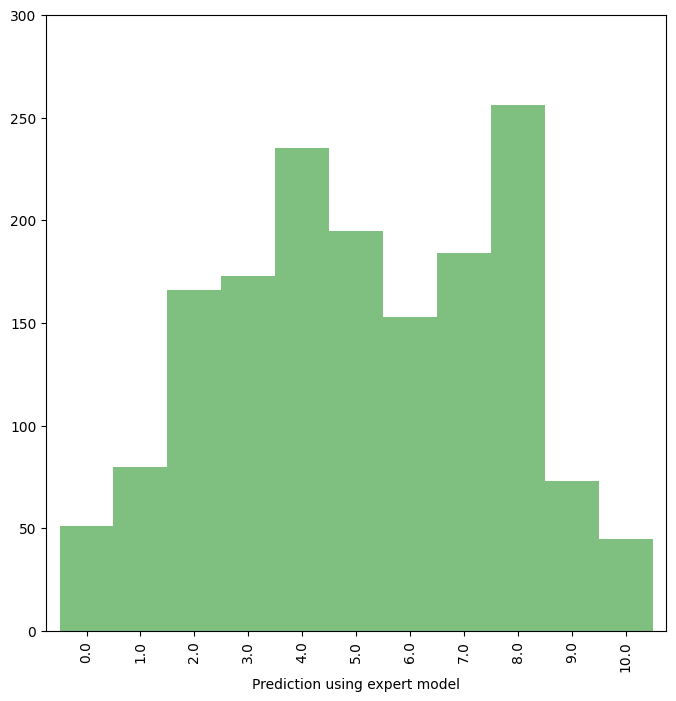

In [23]:
#pd.DataFrame().value_counts(sort=False).plot(kind='bar')

plotdata_predicted = pd.DataFrame(modelRF_lrecon.predict(test_X))#
plotdata_predicted.columns = ['Prediction using expert model']
plotdata_predicted = plotdata_predicted.value_counts(sort=False).reset_index()
plotdata_predicted.columns = ['Prediction using expert model', 'Total']
plotdata_predicted.set_index(['Prediction using expert model'], inplace = True)
plotdata_predicted.plot(kind='bar', legend=False, ylim=(0,300), color='g', alpha=0.5, width=1.0)
#plt.savefig('pics/PRED_VALUES_LRECON_EVS_DATA', dpi=600)

In [24]:
#test_y.value_counts(sort=False).plot(kind='bar')
tempdata_actual = test_y.copy()
tempdata_actual['Type'] = 'LRECON: CHES 2014'
tempdata_actual.columns = ['value', 'Type']
tempdata_predicted = pd.DataFrame(modelRF_lrecon.predict(test_X))
tempdata_predicted['Type'] = 'Prediction using expert model'
tempdata_predicted.columns = ['value', 'Type']
tempdata = pd.concat([tempdata_actual, tempdata_predicted]).reset_index(drop=True)
#tempdata

[Text(0.5, 0, 'LRECON: CHES 2014 / Predicted Value'),
 (0.0, 300.0),

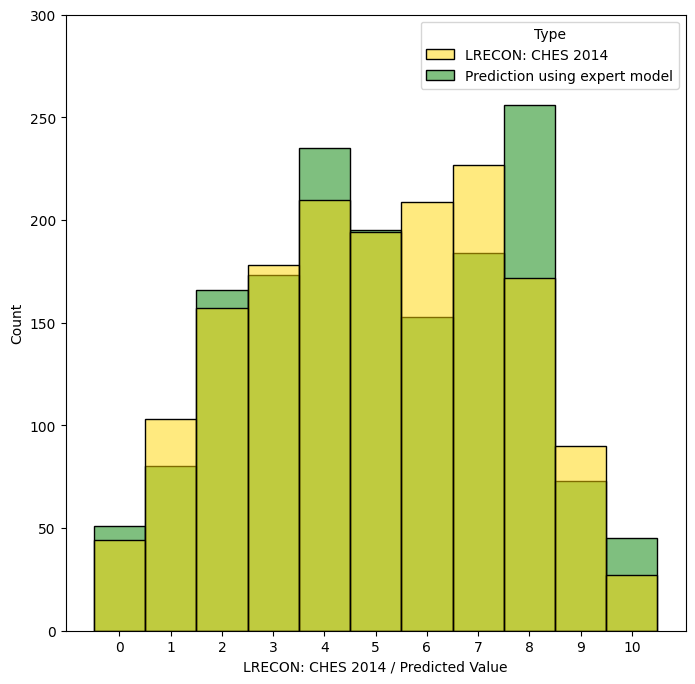

In [25]:
#sns.set_style("whitegrid")
ax = sns.histplot(data=tempdata, x='value', hue='Type', palette=['gold', 'g'], alpha = 0.5, multiple='layer', discrete=True)
ax.set(xlabel='LRECON: CHES 2014 / Predicted Value',
       ylim=(0,300),
       xticks=range(0,11))
#plt.savefig('pics/ACTUAL_PRED_COMPARISON_EVS_DATA', dpi=600)

In [26]:
voter_data_full_woNAN['predicted_values_lrecon'] = pd.Series(modelRF_lrecon.predict(test_X))

# RF reduced target space (4l3c4r): lrecon

In [27]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['lrecon_factor']].replace({0: 'l', 1: 'l', 2: 'l', 3: 'l', 4: 'c', 5: 'c', 6: 'c', 7: 'r', 8: 'r', 9: 'r', 10: 'r'})

In [28]:
### Write several scores to the output ###

RMSE = False
model_vector = [modelRFreduced_lrecon]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sklearn.metrics.mean_squared_error(test_y, model.predict(test_X)))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X), labels=['l', 'c', 'r']))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.7703289882060832
Balanced Accuracy Score:  0.7744825145566491
Cohen-Kappa-Score:  0.6535991241038802
F1-Score:  0.7697701594721923
__________________________________

Confusion matrix: 
 [[370 103   9]
 [ 70 431 112]
 [  7  69 440]]
              precision    recall  f1-score   support

           c       0.71      0.70      0.71       613
           l       0.83      0.77      0.80       482
           r       0.78      0.85      0.82       516

    accuracy                           0.77      1611
   macro avg       0.78      0.77      0.77      1611
weighted avg       0.77      0.77      0.77      1611



In [29]:
voter_data_full_woNAN['predicted_values_lrecon_reduced'] = pd.Series(modelRFreduced_lrecon.predict(test_X))

# RF full target space: galtan

In [30]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['galtan_factor']]

In [31]:
### Write several scores to the output ###

RMSE = True
model_vector = [modelRF_galtan]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sklearn.metrics.mean_squared_error(test_y, model.predict(test_X)))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X)))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.3159528243327126
Balanced Accuracy Score:  0.34191184688045084
Cohen-Kappa-Score:  0.24643767620609647
F1-Score:  0.3137359396335781
RMSE:  2.618249534450652
__________________________________

Confusion matrix: 
 [[37 15  5  1  0  0  0  0  0  0  0]
 [47 42 32  7  4  0  1  1  0  0  0]
 [21 45 62 34 16  2  8  1  1  0  0]
 [ 7 19 50 50 23 24 14  2  3  0  0]
 [ 1  9 23 23 43 39 19  7  4  2  0]
 [ 1  1  8 15 22 39 43 15  5  3  1]
 [ 1  1  3  3 11 28 36 21 20  4  1]
 [ 2  1  1  3  8 16 41 29 52  9  3]
 [ 3  2  1  0  5 11 17 28 57 25  9]
 [ 1  1  0  1  1  0  9 14 35 47 37]
 [ 0  0  0  0  0  0  3  1 12 33 67]]
              precision    recall  f1-score   support

         0.0       0.31      0.64      0.41        58
         1.0       0.31      0.31      0.31       134
         2.0       0.34      0.33      0.33       190
         3.0       0.36      

<AxesSubplot:xlabel='Prediction using expert model'>

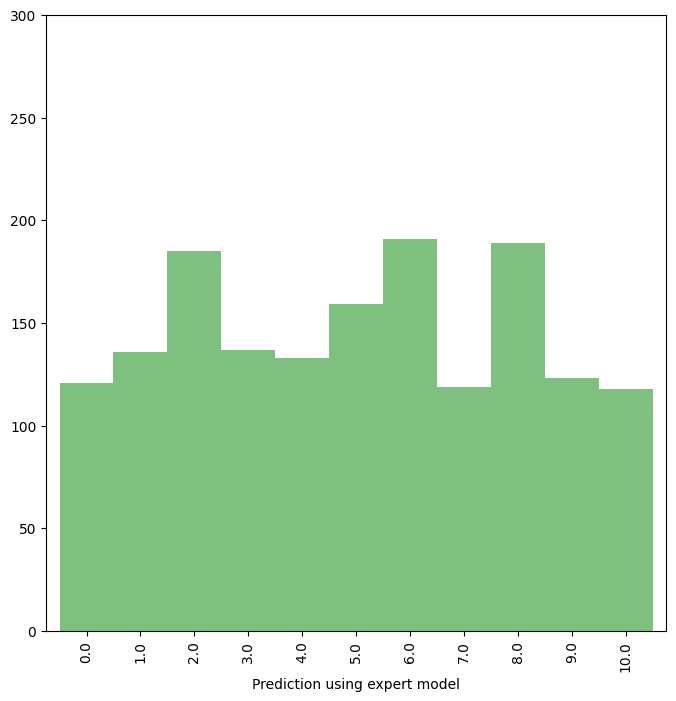

In [32]:
#pd.DataFrame(modelRF_galtan.predict(test_X)).value_counts(sort=False).plot(kind='bar')

plotdata_predicted = pd.DataFrame(modelRF_galtan.predict(test_X))#
plotdata_predicted.columns = ['Prediction using expert model']
plotdata_predicted = plotdata_predicted.value_counts(sort=False).reset_index()
plotdata_predicted.columns = ['Prediction using expert model', 'Total']
plotdata_predicted.set_index(['Prediction using expert model'], inplace = True)
plotdata_predicted.plot(kind='bar', legend=False, ylim=(0,300), color='g', alpha=0.5, width=1.0)
#plt.savefig('pics/PRED_VALUES_GALTAN_EVS_DATA_low_resolution', dpi=150)

In [33]:
#test_y.value_counts(sort=False).plot(kind='bar')
tempdata_actual = test_y.copy()
tempdata_actual['Type'] = 'GALTAN: CHES 2014'
tempdata_actual.columns = ['value', 'Type']
tempdata_predicted = pd.DataFrame(modelRF_galtan.predict(test_X))
tempdata_predicted['Type'] = 'Prediction using expert model'
tempdata_predicted.columns = ['value', 'Type']
tempdata = pd.concat([tempdata_actual, tempdata_predicted]).reset_index(drop=True)
tempdata

,value,Type
0,2.0,GALTAN: CHES 2014
1,2.0,GALTAN: CHES 2014
2,3.0,GALTAN: CHES 2014
3,4.0,GALTAN: CHES 2014
4,2.0,GALTAN: CHES 2014
...,...,...
3217,3.0,Prediction using expert model
3218,7.0,Prediction using expert model
3219,2.0,Prediction using expert model
3220,7.0,Prediction using expert model


[Text(0.5, 0, 'GALTAN: CHES 2014 / Predicted Value'),
 (0.0, 300.0),

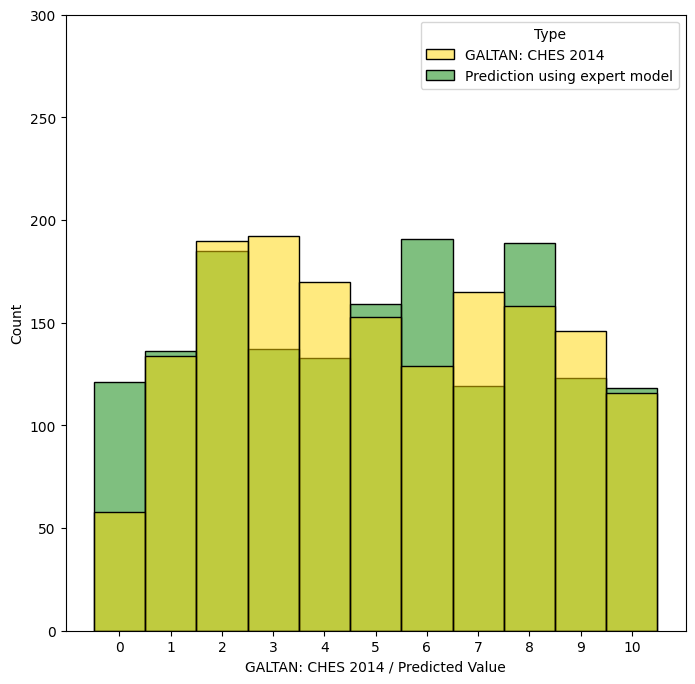

In [34]:
#sns.set_style("whitegrid")
ax = sns.histplot(data=tempdata, x='value', hue='Type', palette=['gold', 'g'], alpha = 0.5, multiple='layer', discrete=True)
ax.set(xlabel='GALTAN: CHES 2014 / Predicted Value',
       ylim=(0,300),
       xticks=range(0,11))
#plt.savefig('pics/ACTUAL_PRED_COMPARISON_EVS_DATA', dpi=600)

In [35]:
voter_data_full_woNAN['predicted_values_galtan'] = pd.Series(modelRF_galtan.predict(test_X))

# RF reduced target space (4l3c4r): galtan

In [36]:
# econ_interven 	environment 	redistribution 	civlib_laworder 	immigrate_policy 	sociallifestyle
test_X = voter_data_full_woNAN[['econ_interven', 'environment', 'redistribution', 'civlib_laworder', 'immigrate_policy', 'sociallifestyle']]
test_y = voter_data_full_woNAN[['galtan_factor']].replace({0: 'l', 1: 'l', 2: 'l', 3: 'l', 4: 'c', 5: 'c', 6: 'c', 7: 'r', 8: 'r', 9: 'r', 10: 'r'})

In [37]:
### Write several scores to the output ###

RMSE = False
model_vector = [modelRFreduced_galtan]
for model in model_vector:
    print(model.estimator.named_steps)
    print('Accuracy Score: ', sklearn.metrics.accuracy_score(test_y, model.predict(test_X)))
    print('Balanced Accuracy Score: ', sklearn.metrics.balanced_accuracy_score(test_y, model.predict(test_X)))
    print('Cohen-Kappa-Score: ', sklearn.metrics.cohen_kappa_score(test_y, model.predict(test_X)))
    print('F1-Score: ', sklearn.metrics.f1_score(test_y, model.predict(test_X), average='weighted'))
    if RMSE == True:
        print('RMSE: ', sklearn.metrics.mean_squared_error(test_y, model.predict(test_X)))
        #print('ROC-AUC-Score: ', sklearn.metrics.roc_auc_score(test_y, 
        #                                                       model.predict(test_X), 
        #                                                       average='weighted', 
        #                                                       multi_class='ovo'))
    print('__________________________________\n')

for model in model_vector:
    print('Confusion matrix: \n', sklearn.metrics.confusion_matrix(test_y, model.predict(test_X), labels=['l', 'c', 'r']))

for model in model_vector:
    print(sklearn.metrics.classification_report(test_y, model.predict(test_X)))

{'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(criterion='entropy', random_state=1)}
Accuracy Score:  0.7635009310986964
Balanced Accuracy Score:  0.7545653401686211
Cohen-Kappa-Score:  0.6440355065000138
F1-Score:  0.7660325693360933
__________________________________

Confusion matrix: 
 [[466 100   8]
 [ 91 290  71]
 [ 11 100 474]]
              precision    recall  f1-score   support

           c       0.59      0.64      0.62       452
           l       0.82      0.81      0.82       574
           r       0.86      0.81      0.83       585

    accuracy                           0.76      1611
   macro avg       0.76      0.75      0.75      1611
weighted avg       0.77      0.76      0.77      1611



In [38]:
voter_data_full_woNAN['predicted_values_galtan_reduced'] = pd.Series(modelRFreduced_galtan.predict(test_X))